In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 10)

## Principal component analysis (PCA)

### Load the data

We create a Pandas DataFrame by reading from a `.csv` file which contains the vertices of a 3D model of a bicycle. Let's visualize the data.

In [6]:
X = pd.read_csv('bike.csv', sep=';', header=None)

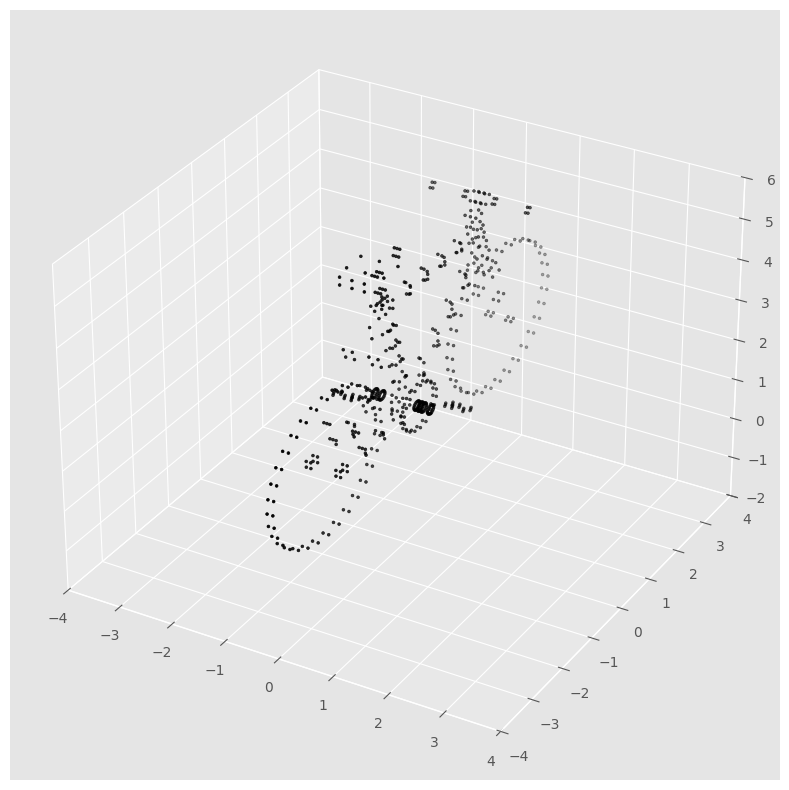

In [7]:

from mpl_toolkits.mplot3d import Axes3D

def bike_plot(df):
    df.columns=['x', 'y', 'z']
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d', xlim=[-4, 4], ylim=[-4, 4], zlim=[-2, 6])

    x = df['x']
    y = df['y']
    z = df['z']

    ax.scatter(x, y, z, marker='o', s=4, color='k')


bike_plot(X)

### Perform PCA

Next, let's create a `PCA` transformer from scikit-learn's `decomposition` module. We will specify it to have 2 components, since we're trying to turn a 3D image into a 2D projection. We will use the `fit_transform` method to fit the transformer to the data and we will store the transformed data matrix as a new variable.

**Note:** The data that is fed into a PCA algorithm should be centered, which means that the mean of every column/feature needs to equal 0. Scikit-learn's `PCA` transformer centers the data for us, so we can actually feed it not-centered data and it subtracts the column mean for every column before it performs PCA. 

In [10]:
from sklearn.decomposition import PCA

bike_pca = PCA(n_components=2)
X_transformed = bike_pca.fit_transform(X)

Let's examine this new array a bit and compare it to the original data.

In [12]:
print('Shape of original data: ', X.shape)
print('Shape of transformed data: ', X_transformed.shape)

Shape of original data:  (614, 3)
Shape of transformed data:  (614, 2)


In [13]:
X_transformed[:10]

array([[ 0.49344383,  2.11038542],
       [ 0.48047222,  2.43413293],
       [ 0.33878721,  2.39820935],
       [ 0.35175882,  2.07446185],
       [ 0.46158628,  2.90552217],
       [ 0.31990219,  2.86959883],
       [ 0.47960244,  2.16369246],
       [ 0.48047418,  2.43287522],
       [ 0.46158823,  2.90426447],
       [-2.38365215,  1.38216994]])

Now let's plot the transformed data. We expect to obtain the 2D projection.

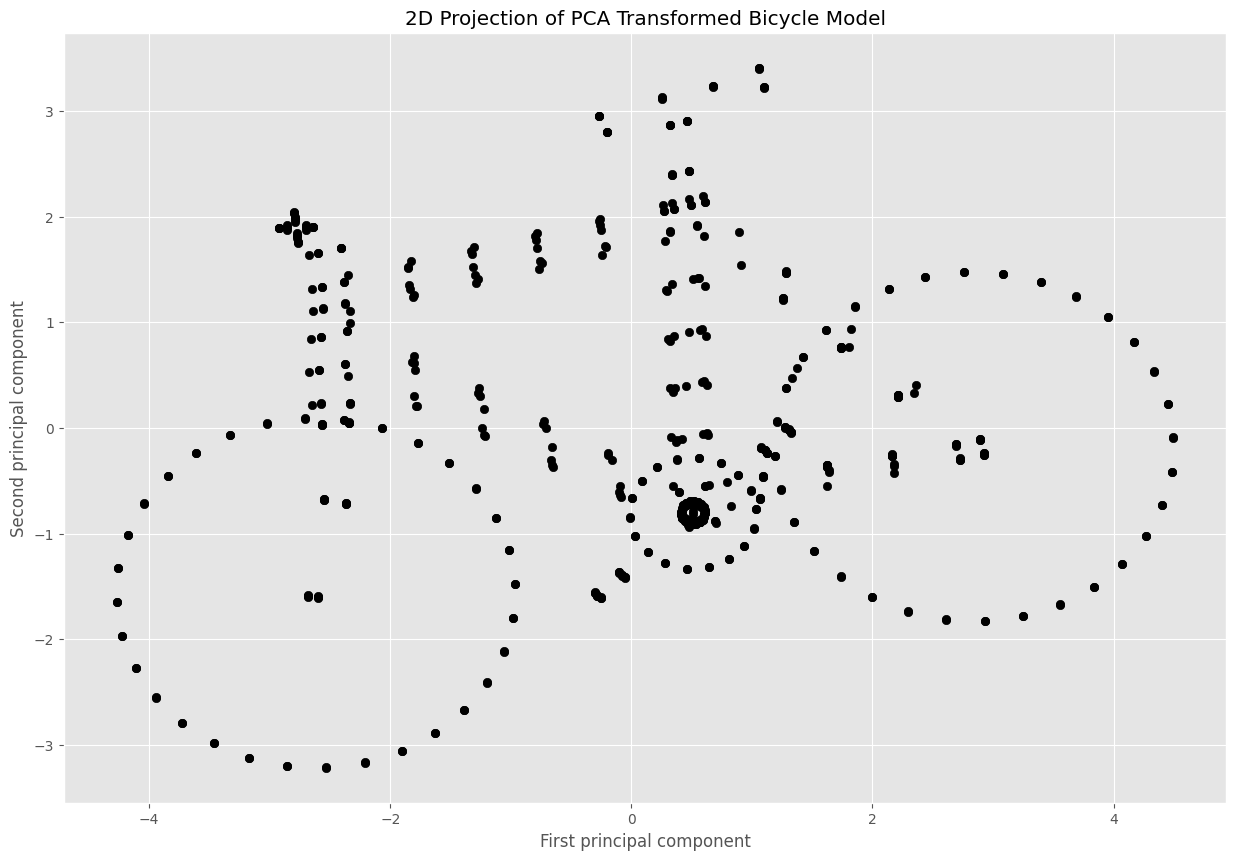

In [15]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], color='k')
plt.title('2D Projection of PCA Transformed Bicycle Model')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

What happens if we use this fitted transformer on a rotated version of the bicycle model? Let's load in the data of another bicycle model. This one has been rotated in 3D space compared to the original.

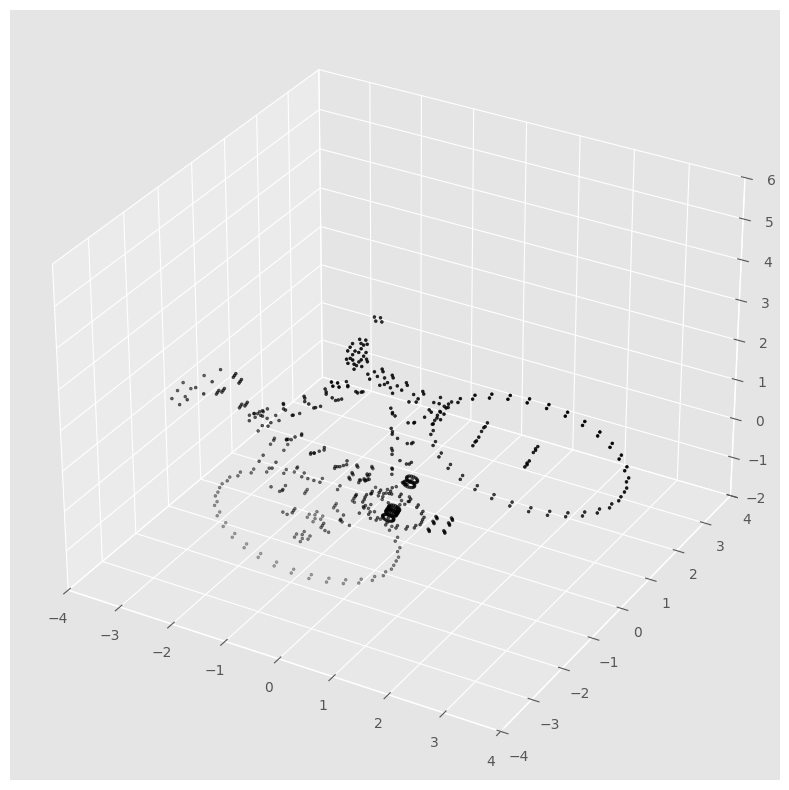

In [17]:
X_rotated = pd.read_csv('bike-rotate.csv', sep=';', header=None)
bike_plot(X_rotated)


---

**Group Discussion**

 - What do you expect to see if use the (already-fit) `PCA` transformer on the 3D array of vertices for this rotated bicycle and we plot the projected data?
 
---


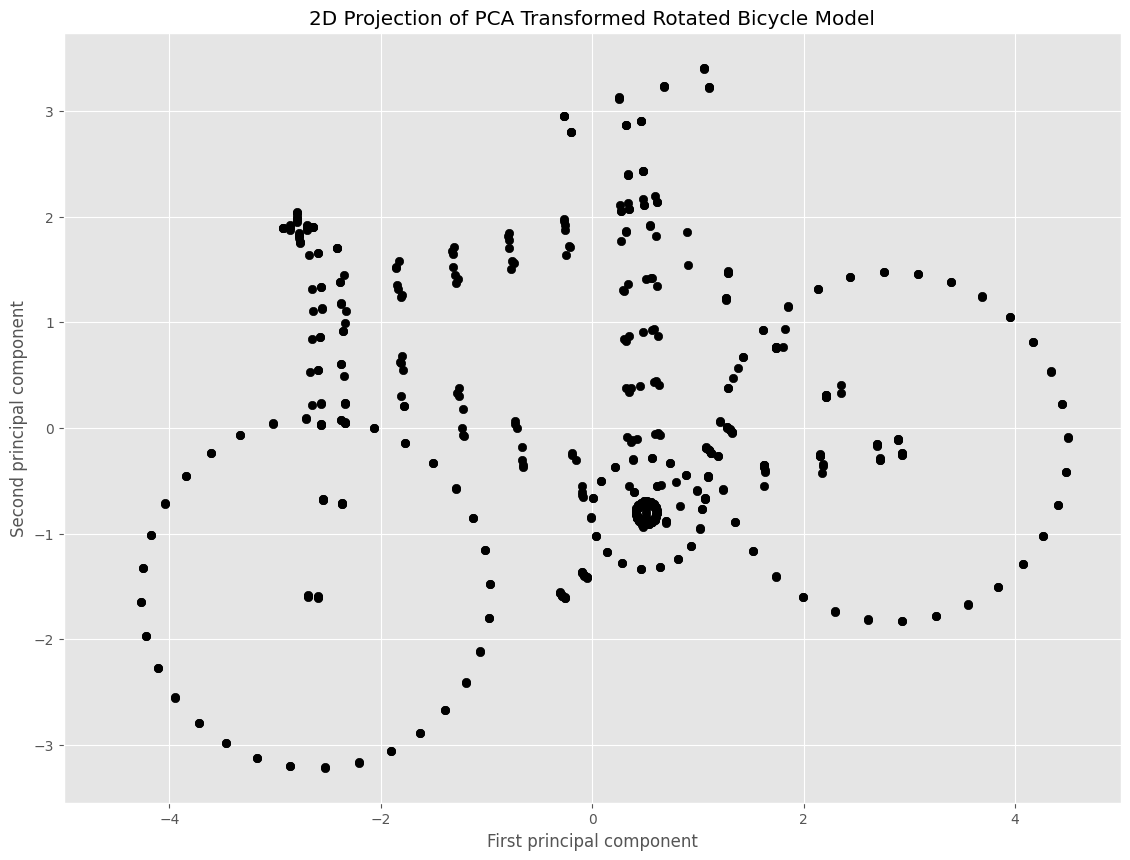

In [19]:
X_rotated_transformed = bike_pca.fit_transform(X_rotated)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_rotated_transformed[:,0], X_rotated_transformed[:,1], color='k')
ax.set_aspect('equal')
plt.xlim([-5, 5])
plt.title('2D Projection of PCA Transformed Rotated Bicycle Model')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

### Exercise

1. Change the code in the cell above such that you no longer use an already trained transformer but instead make a new one and get a 2D projection of the rotated bicycle that preserves as much information as possible.

## Using real-world data

For this demonstration we will work with the `mpg` data set from seaborn. This is a data set that contains information about individual cars such as vehicle cylinders, horsepower, fuel consumption in miles per gallon (mpg), weight, etc. Let's load the data and for now just work with the `'weight'` and `'mpg'` columns.

In [24]:
cars = sns.load_dataset('mpg')[['weight', 'mpg']]
print('cars data: {} rows, {} columns'.format(*cars.shape))
cars.head(3)

cars data: 398 rows, 2 columns


,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0


Let's generate a scatter plot of the data.

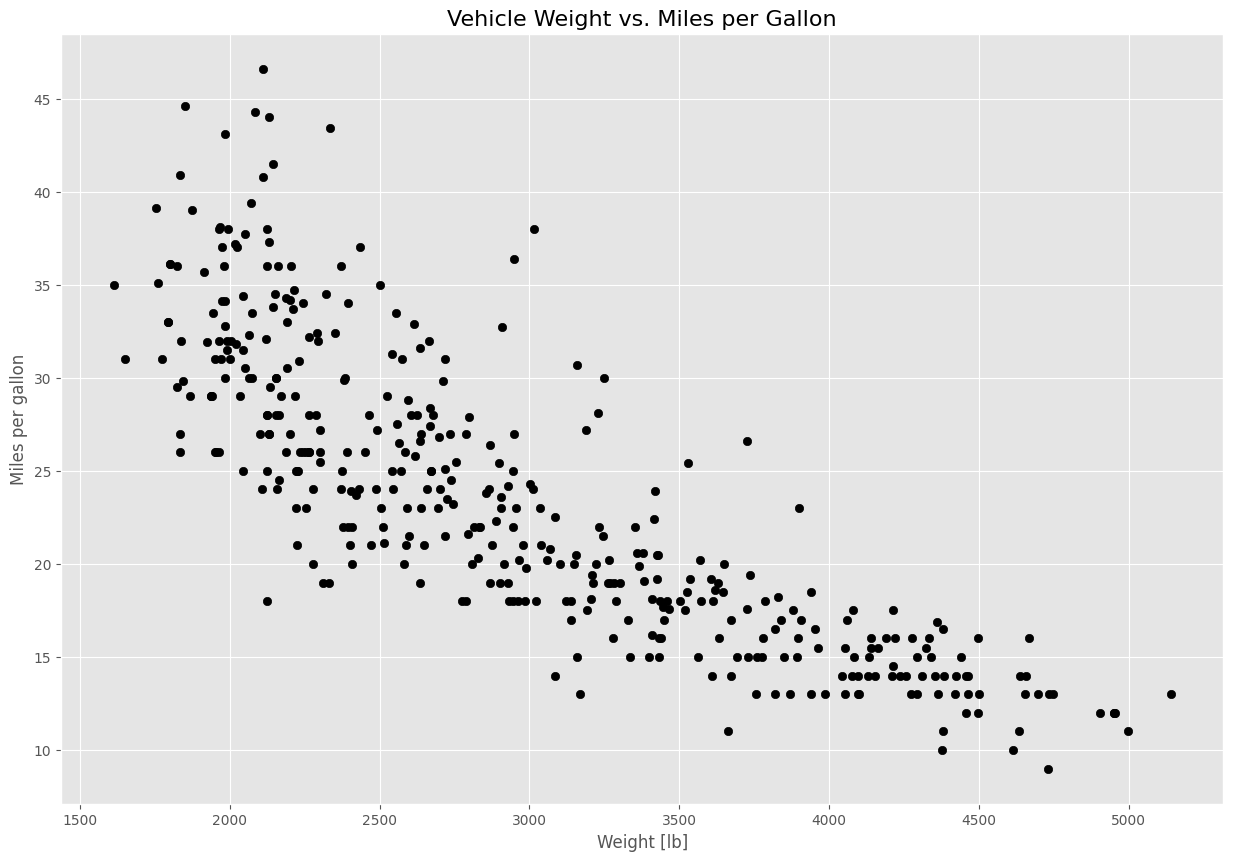

In [26]:
plt.scatter(cars['weight'], cars['mpg'], color='k')
plt.xlabel("Weight [lb]")
plt.ylabel("Miles per gallon")
plt.title("Vehicle Weight vs. Miles per Gallon", fontsize=16);

## PCA in practice - scaling the data

We already mentioned that data that is fed into a PCA algorithm should be centered. But on top of centering the data, depending on the nature of our data, we may also need to standardize it. Standardizing the data means making the data centered and scaling it to make each feature have a unit variance (remember `StandardScaler`?).

To demonstrate why and when scaling is necessary, let's use the cars data set and first look at some summary statistics for each column.

In [29]:
cars.describe()

,weight,mpg
count,398.000000,398.000000
mean,2970.424623,23.514573
std,846.841774,7.815984
min,1613.000000,9.000000
25%,2223.750000,17.500000
50%,2803.500000,23.000000
75%,3608.000000,29.000000
max,5140.000000,46.600000


Note the huge difference in magnitude between these features! This is unsurprising given their units. We know that cars tend to weigh thousands of pounds and tend to have mileage ratings in the 2-digit range. As we saw in the bicycle example, PCA finds the best direction along which to project the data into a space of fewer dimensions by finding the directions in feature space along which the data varies most. So variance (square of the standard deviation) of individual features will be important. Let's look at the variance of each feature in the cars data set.

In [31]:
cars.var()

weight    717140.990526
mpg           61.089611
dtype: float64

We can see that almost all of the variance is given by `'weight'`. In fact, we could check the current variance ratio:

In [33]:
cars.var()/cars.var().sum()

weight    0.999915
mpg       0.000085
dtype: float64

Because of the radically different numerical scales of the units, `'weight'` captures over 99.99% of the variance in the data. But units that measure car weight and units that measure mpg are currently incomparable and even arbitrary. What would happen if we measured the weight in kilograms and mileage in meters per liter?

In [35]:
cars_metric = pd.DataFrame([cars['weight']/2.20462, cars['mpg']*425.144]).T
cars_metric.columns=['weight', 'mpl']
cars_metric.var()/cars_metric.var().sum()

weight    0.013187
mpl       0.986813
dtype: float64

Now the data seems to tell a totally different story. So which is right? Neither. When we perform PCA, it is crucial that we get our features to comparable units. In the case of the bicycle model above, the $x$, $y$, and $z$ features were all physical measurements in the same units, so in that case we used the data without scaling because standardizing the data when features are already measured in the same units could result in loss of important information. But if the features are in different units like in the cars example, we have to standardize the data. If we didn't, then the `'weight'` column in pounds would be on a much larger scale than the `'mpg'` column and this would give unwanted effects on our PCA. 

Thus, before we perform PCA on the cars data set, we're going to normalize the data using scikit-learn's `StandardScaler` transformer. This transformer will convert the units of each feature to a similar scale by centering each column at zero and dividing each column by its standard deviation. We can then think of the units as "deviations from the mean" instead of their raw values. 

Let's use `StandardScaler` on cars data set.

In [37]:
from sklearn.preprocessing import StandardScaler

cars_rescale = StandardScaler().fit_transform(cars)
cars_rescale = pd.DataFrame(cars_rescale)
cars_rescale.columns = ['weight', 'mpg']

In [38]:
cars_rescale.describe().round(3)

,weight,mpg
count,398.000,398.000
mean,-0.000,0.000
std,1.001,1.001
min,-1.605,-1.859
25%,-0.883,-0.770
50%,-0.197,-0.066
75%,0.754,0.703
max,2.565,2.957


## Principal axes and explained variance

Now we are going to use PCA to project the scaled 2D data onto a 1D space. This means that the **PCA algorithm will find the direction in the original space (the vector) along which the variance of the data is largest**. Intuitively, we can understand this as the direction with the most spread in the data. The vectors obtained by the PCA are also known as the **principal axes**.

Before reducing our data to one dimension, we'll start with a 2D PCA. This way, we will not actually reduce the dimensionality of the data but we will obtain two principal axes and we can examine and compare them.

In [41]:
cars_pca = PCA(n_components=2).fit(cars_rescale)

As we call the `fit` method, scikit-learn's `PCA` transformer learns its model parameters and stores useful information in several different attributes. Some of the most important `PCA` attributes are:
- `components_`: the attribute that contains the axis vectors under the PCA projection.
- `explained_variance_ratio_`: the attribute that holds the relative amount of variance (information) in the data that is described by each component of the PCA projection.

Let's examine the `components_` attribute.

In [44]:
cars_transformed = cars_pca.transform (cars_rescale)

In [45]:
cars_pca.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

We see that `components_` attribute holds two 2D vectors. The first row of the matrix above is the direction along which the data has the greatest variance. What direction does the second vector correspond to? Let's take the dot product between the two 2D vectors to find out.

In [47]:
import numpy as np

np.dot(cars_pca.components_[:,0], cars_pca.components_[:,1])

-1.01465363575696e-17

Recall that if two vectors have a dot product of zero, then they are **orthogonal** (thus perpendicular or linearly independent). It will always be the case that any two components obtained from a PCA will be orthogonal! 

---

**Group Discussion**

- Why is it desirable to have orthogonal components?
---

Next, let's take a look at the explained variance ratio.

In [50]:
cars_pca.explained_variance_ratio_

array([0.91587047, 0.08412953])

In [51]:
ratio_sum = cars_pca.explained_variance_ratio_.cumsum()

In [52]:
ratio_sum

array([0.91587047, 1.        ])

In [53]:
len(ratio_sum)

2

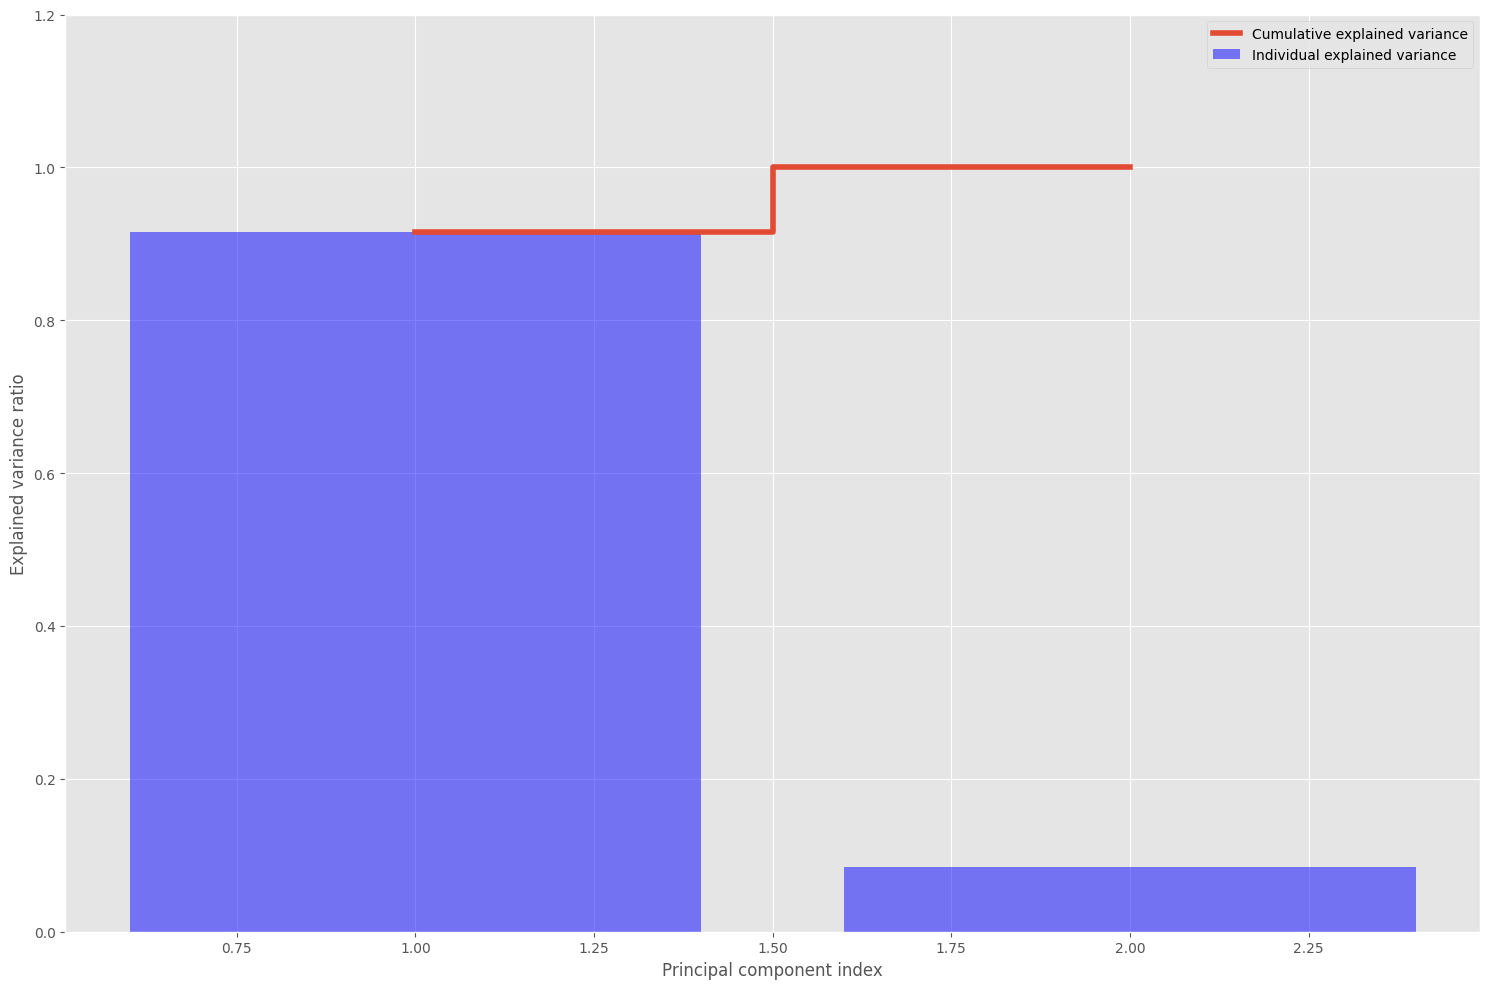

In [54]:
plt.bar(range(1,len(ratio_sum)+1), cars_pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance', color = "b")
plt.step(range(1,len(ratio_sum)+1), ratio_sum, where='mid',label='Cumulative explained variance', linewidth = 4 )
plt.ylabel('Explained variance ratio')
plt.ylim (0,1.2)
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We see that PCA orders principal components in descending order of explained variance. This might not be as clear here because we are working with only two features, but in general it is the case that every PCA component captures more variance than the component that follows it.

Another thing we see is that the first component explains 91.6% of the variance in the data. Put another way, if we projected the data onto only the first component, essentially flattening it such that all points lie along the line of the first component, then the data would still capture 91.6% of its original variance.

To further understand the meaning of the components and explained variance ratios, let's plot the component vectors over the data and scale them by their explained variance.

Text(0.7, 0.7, 'PC2')

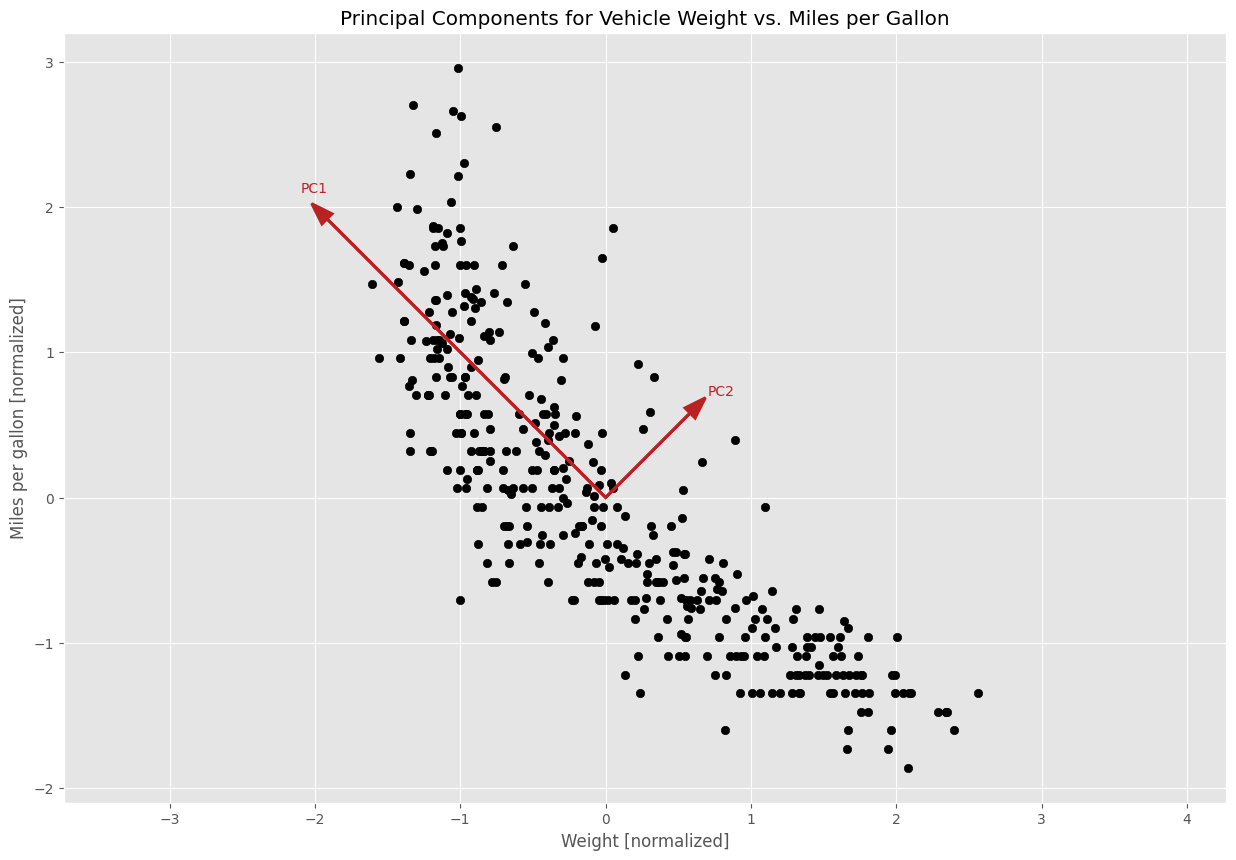

In [56]:
plt.scatter(cars_rescale['weight'], cars_rescale['mpg'], color='k')
plt.axis('equal');
plt.xlabel("Weight [normalized]")
plt.ylabel("Miles per gallon [normalized]")
plt.title("Principal Components for Vehicle Weight vs. Miles per Gallon")

for length, vector in zip(cars_pca.explained_variance_, cars_pca.components_):
    v = vector * 2 * np.sqrt(length)
    plt.arrow(0, 0,v[0],v[1], capstyle='projecting', 
              edgecolor='#ba2121ff', facecolor='#ba2121ff', linewidth=2, head_width=.1)
plt.text(-2.1, 2.1, 'PC1', color = '#ba2121ff')
plt.text(0.7, 0.7, 'PC2', color = '#ba2121ff')



### Group discission: 
How you interprete this plot? What do arrows representing?

In [58]:
loadings = cars_pca.components_.T

In [87]:
loadings

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

Text(0.5, 1.0, 'Principal Components for Vehicle Weight vs. Miles per Gallon')

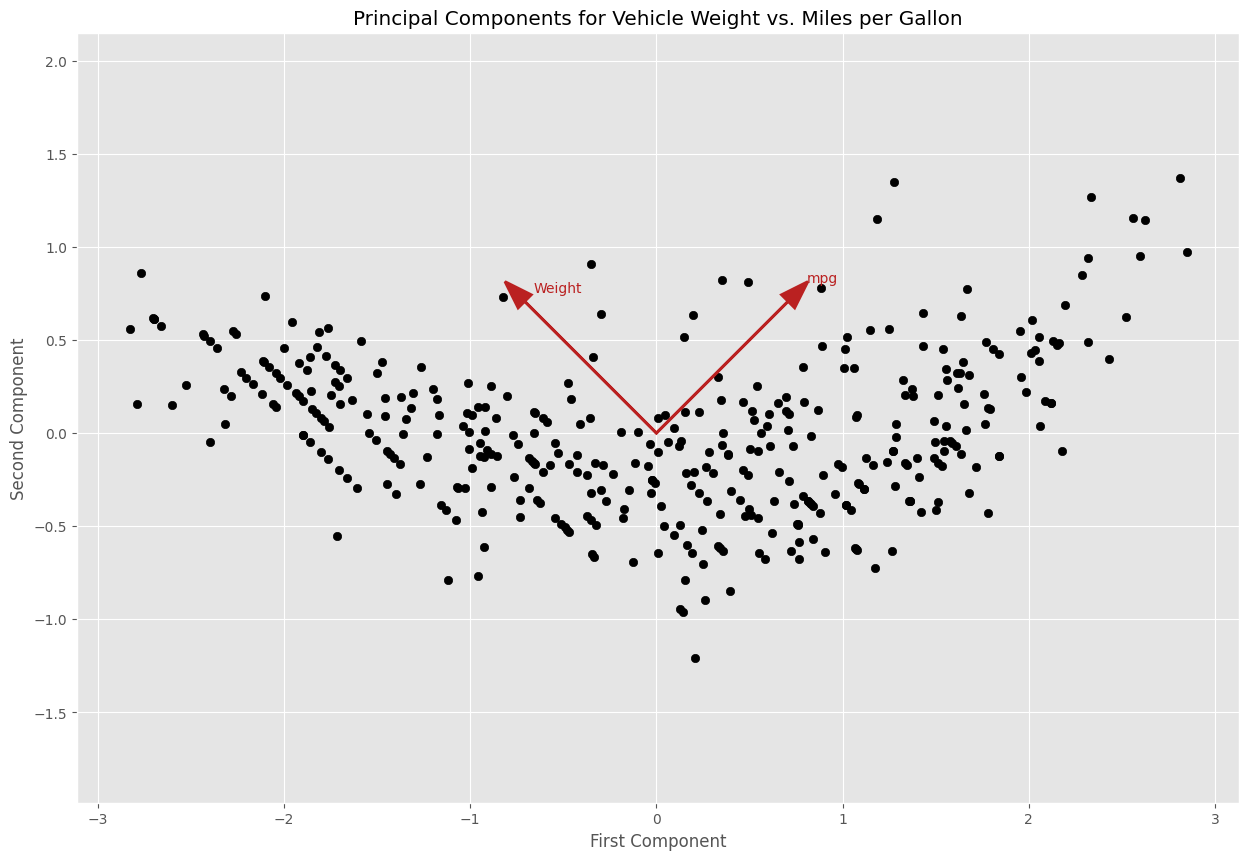

In [108]:
plt.scatter(cars_transformed[:,0], cars_transformed[:,1], color='k')
plt.arrow(0, 0, loadings[0,0], loadings[1,0],capstyle='projecting', 
              edgecolor='#ba2121ff', facecolor='#ba2121ff', linewidth=2, head_width=.1)
plt.text(loadings[0,0]+0.05, loadings[1,0]+0.05, 'Weight', color = '#ba2121ff')
plt.arrow(0, 0, loadings[0,1], loadings[1,1],capstyle='projecting', 
              edgecolor='#ba2121ff', facecolor='#ba2121ff', linewidth=2, head_width=.1)
plt.text(loadings[0,1]+0.1, loadings[1,1]+0.1, 'mpg', color = '#ba2121ff')
plt.axis('equal');
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Principal Components for Vehicle Weight vs. Miles per Gallon")


### Exercise

1. Make a new code cell and compute the explained variance of principal component 1 and principal component 2 for the bicycle data set.
1. Generate the same plot as the one above for the bicycle data set. Use PCA to obtain 2 principal components. Plot the data together with the two principal component vectors, scaled by their explained variance. Plot the biplot with loading factors as arrows